## Testing Volatility Models

In [8]:
import datetime as dt
import pandas as pd
import seaborn as sns
from arch import arch_model

In [63]:
ind_rets = pd.read_csv("SX5E_OMXS30_drets_vol.csv",
                      header=0, index_col=0, parse_dates=True).dropna()
ind_rets.index = pd.to_datetime(ind_rets.index, format="%Y%m%d")

In [65]:
ind_rets.head()

,SX5E_Vol,SX5E,OMXS30
Dates,,,
2015-10-19,0.00,0.00,0.00
2015-10-20,-3.28,-0.50,0.59
2015-10-21,0.53,0.51,-0.99
2015-10-22,-8.51,2.47,2.23
2015-10-23,-0.86,2.17,1.49


In [360]:
from arch import arch_model
eur_rets = ind_rets['SX5E'].dropna()

In [362]:
gm = arch_model(eur_rets,vol='Garch')
res_gm = gm.fit(update_freq=5)

em = arch_model(eur_rets,vol='Egarch')
res_em = em.fit(update_freq=5)

fm = arch_model(eur_rets, vol='Figarch')
res_fm = fm.fit(update_freq=5)

am = arch_model(eur_rets, vol='Aparch')
res_am = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     36,   Neg. LLF: 4010.050011187027
Iteration:     10,   Func. Count:     63,   Neg. LLF: 3564.2256362348
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3564.2256362348
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      5,   Func. Count:     40,   Neg. LLF: 3571.4217367909396
Iteration:     10,   Func. Count:     65,   Neg. LLF: 3571.0109815817495
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3571.0109815817495
            Iterations: 11
            Function evaluations: 69
            Gradient evaluations: 11
Iteration:      5,   Func. Count:     41,   Neg. LLF: 3554.1020633943367
Iteration:     10,   Func. Count:     74,   Neg. LLF: 3552.7613963805998
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3552.761395018515
            Iterations: 12
            Fu

In [363]:
eur_vol = ind_rets['SX5E_Vol'].dropna() / 100

cum_eur_vol = 1 * (1 + eur_vol).cumprod()

garch_eur_vol = res_gm.conditional_volatility
egarch_eur_vol = res_em.conditional_volatility
figarch_eur_vol = res_fm.conditional_volatility
aparch_eur_vol = res_am.conditional_volatility

Mean Spread Garch:     0.0138
Mean Spread Egarch:    0.0185
Mean Spread Figarch: 0.0027
Mean Spread Aparch: 0.0168


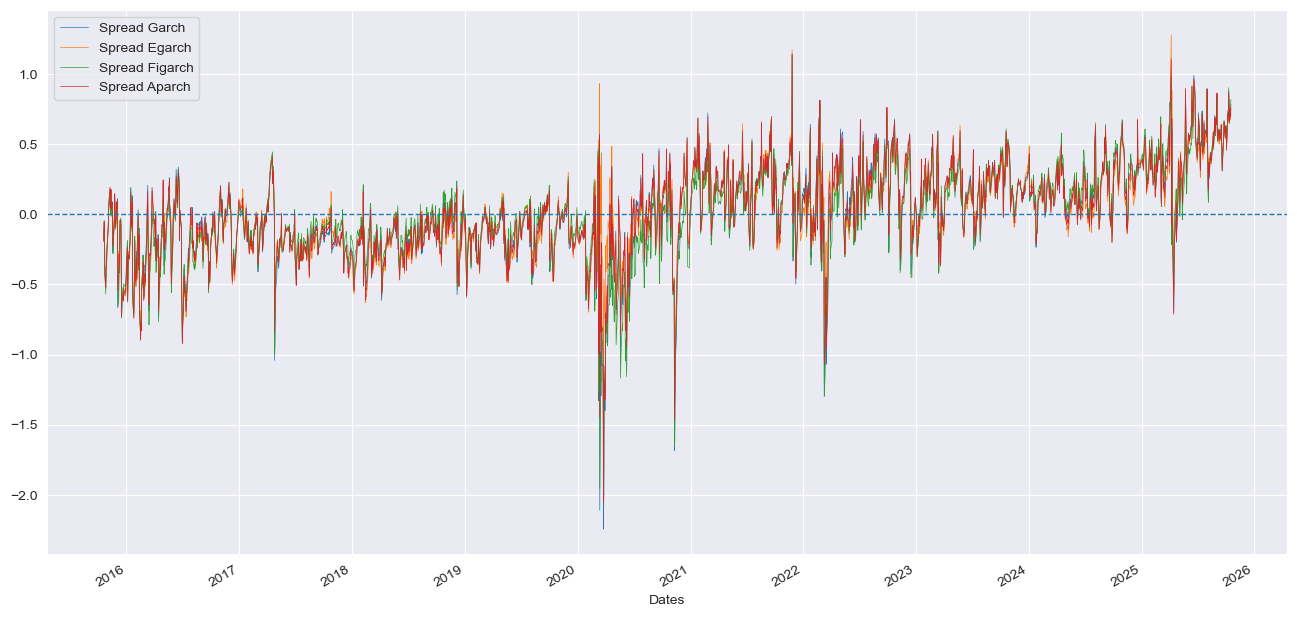

In [372]:
spread_gm = cum_eur_vol - garch_eur_vol
spread_em = cum_eur_vol - egarch_eur_vol
spread_fm = cum_eur_vol - figarch_eur_vol
spread_am = cum_eur_vol - aparch_eur_vol

mean_gm = spread_gm.mean()
mean_em = spread_em.mean()
mean_gm_har = spread_gm_har.mean()
mean_fm = spread_fm.mean()
mean_am = spread_am.mean()

ax = spread_gm.plot(figsize=(16,8), label='Spread Garch', linewidth=.5)

spread_em.plot(ax=ax, label='Spread Egarch', linewidth=.5)
spread_fm.plot(ax=ax, label='Spread Figarch', linewidth=.5)
spread_am.plot(ax=ax, label='Spread Aparch', linewidth=.5)

ax.axhline(0, linestyle='--', linewidth=1)
ax.legend()

print(f"Mean Spread Garch:     {mean_gm:.4f}")
print(f"Mean Spread Egarch:    {mean_em:.4f}")
print(f"Mean Spread Figarch: {mean_fm:.4f}")
print(f"Mean Spread Aparch: {mean_am:.4f}")

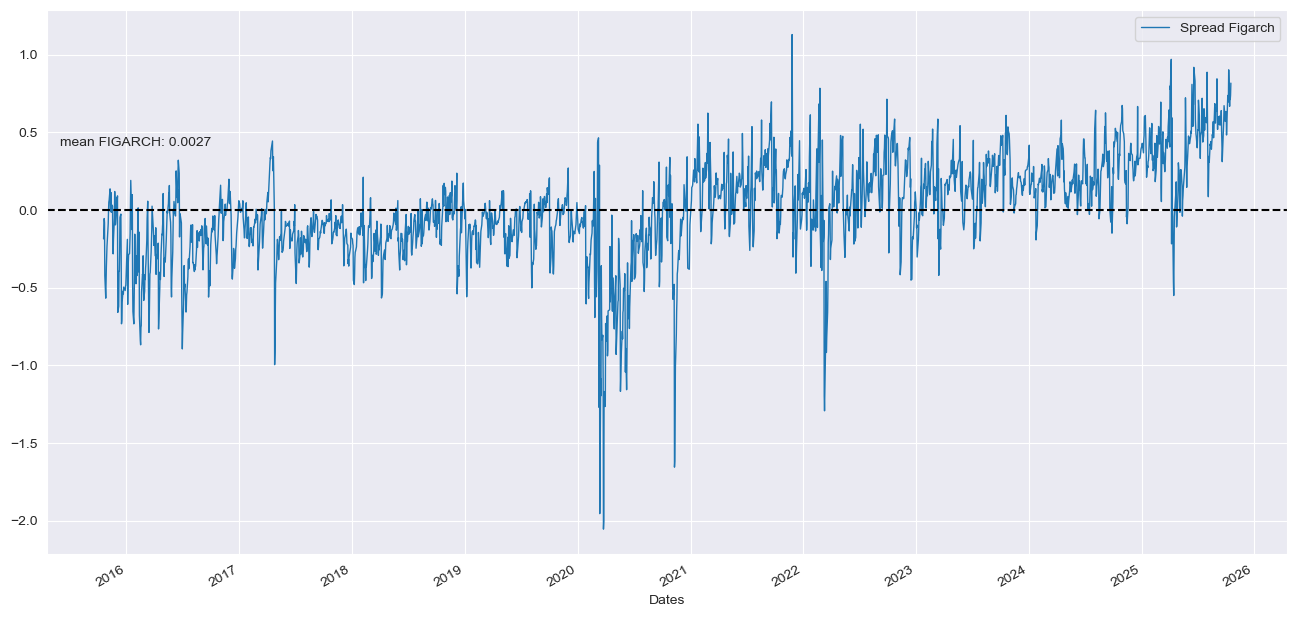

In [436]:
ax = spread_fm.plot(figsize=(16,8), label='Spread Figarch', linewidth=1)
ax.axhline(mean_fm, linestyle='--', linewidth=1.5, color='black')
ax.text(.01, .75, f"mean FIGARCH: {mean_fm:.4f}", transform=ax.transAxes)
ax.legend()